<a href="https://colab.research.google.com/github/Harin22/Hit-Song-Predictor/blob/main/EDA_and_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing frameworks

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Understanding the Dataset

In [4]:
df = pd.read_csv('Spotify dataset.csv')
display(df.head())

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [5]:
display(df.info())
display(df.describe())

display(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

None

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


,0
valence,0
year,0
acousticness,0
artists,0
danceability,0
duration_ms,0
energy,0
explicit,0
id,0
instrumentalness,0


# Exploratory Data Analysis (EDA)

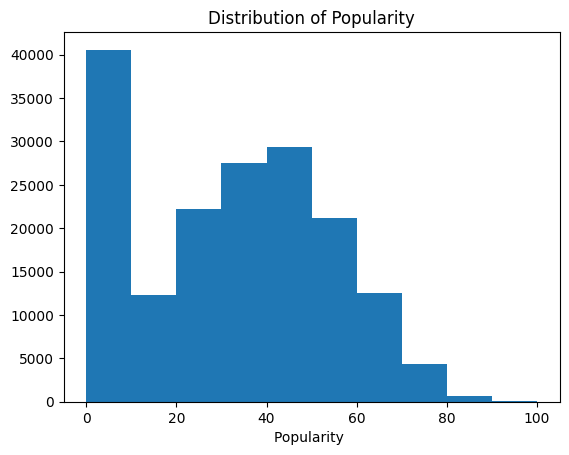

In [6]:
plt.hist(df['popularity'])
plt.xlabel('Popularity ')
#plt.ylabel('Frequency')
plt.title('Distribution of Popularity')
plt.show()

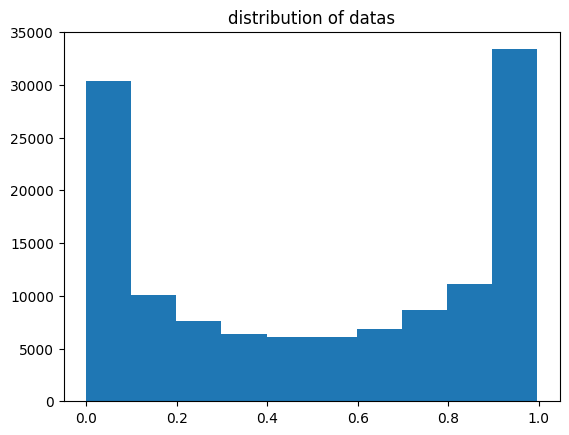

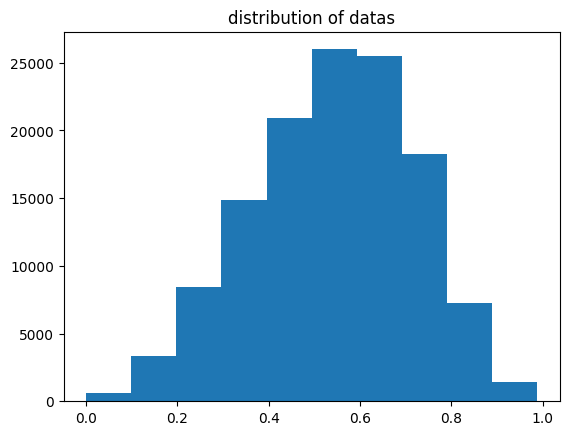

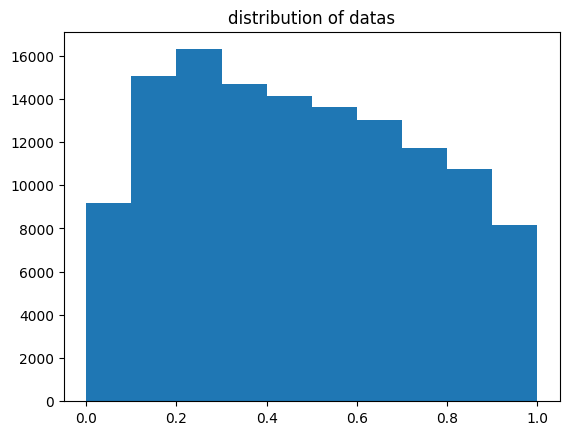

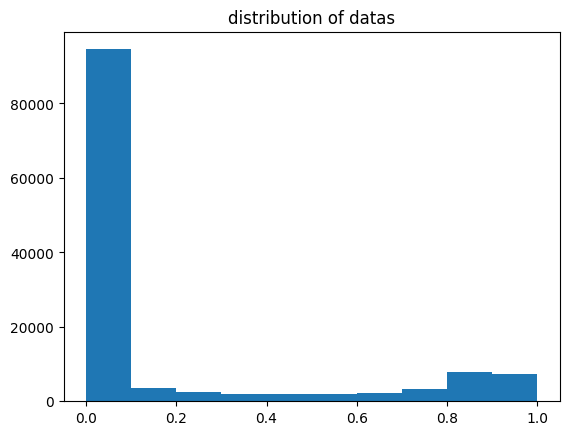

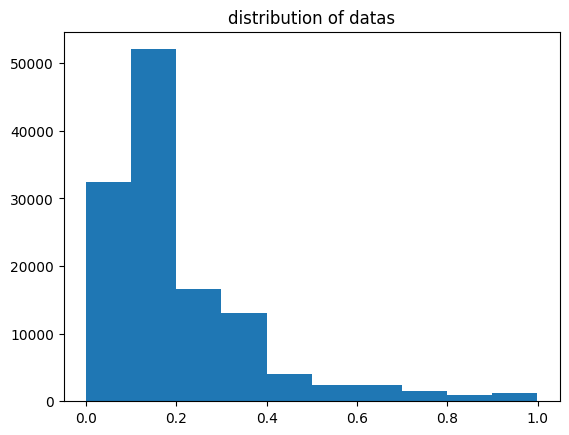

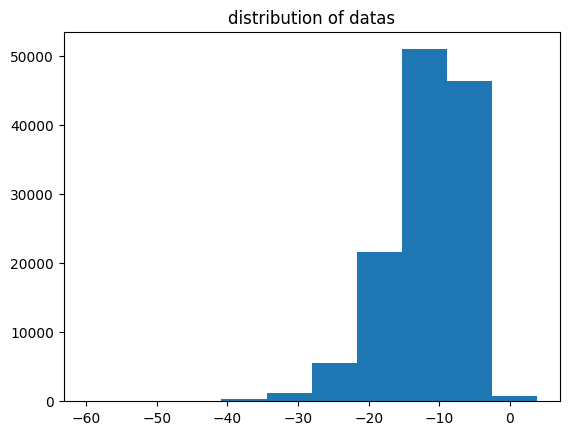

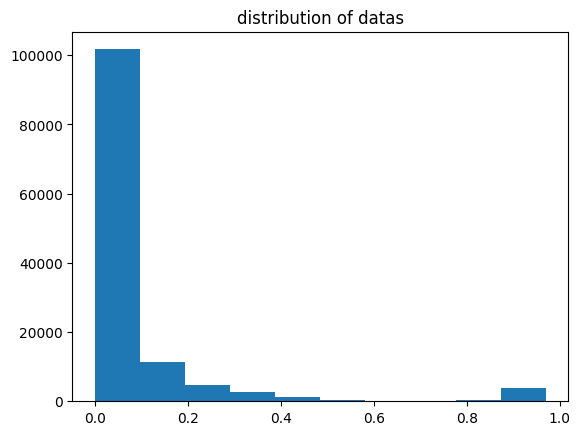

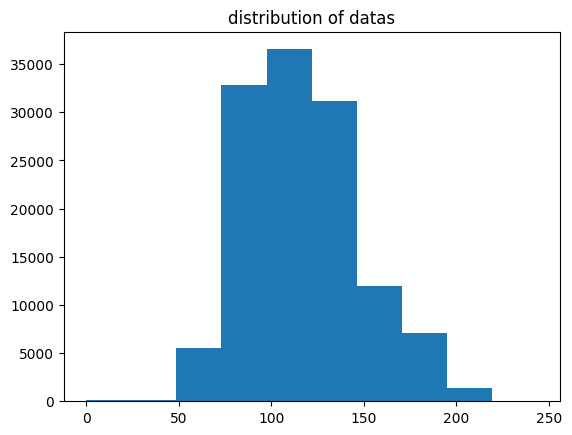

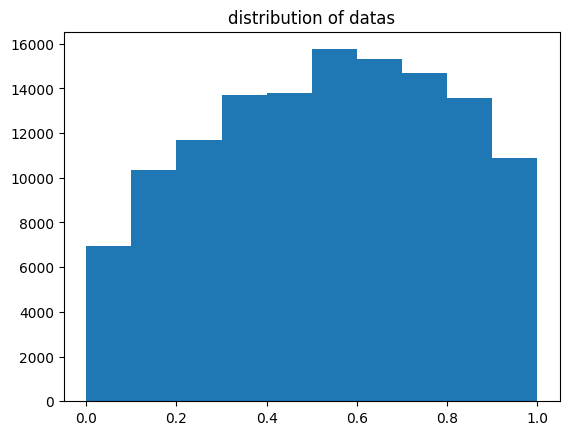

In [ ]:

numerical_values = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

for colums in numerical_values:
    plt.hist(df[colums])
    plt.title("distribution of datas")
    plt.show() #to check visualizing distributions

In [7]:
df.isnull().sum() #checking if any nullvalues

,0
valence,0
year,0
acousticness,0
artists,0
danceability,0
duration_ms,0
energy,0
explicit,0
id,0
instrumentalness,0


In [8]:
df.duplicated().sum()  #checking if any duplicatevalues

np.int64(0)

In [10]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce', infer_datetime_format=True)
print(df['release_date'].head())
print(df['release_date'].tail())


0   1921-01-01
1   1921-01-01
2   1921-01-01
3   1921-01-01
4   1921-01-01
Name: release_date, dtype: datetime64[ns]
170648   NaT
170649   NaT
170650   NaT
170651   NaT
170652   NaT
Name: release_date, dtype: datetime64[ns]


<ipython-input-10-a2563089f82d>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce', infer_datetime_format=True)


In [11]:
df.columns
df.drop(columns=['artists'], inplace=True)
display(df.columns)

Index(['valence', 'year', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'explicit', 'id', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'name', 'popularity', 'release_date', 'speechiness',
       'tempo'],
      dtype='object')

In [12]:
#df.drop(columns=['key', 'release_year', 'extracted_year'], inplace=True)
display(df.columns)


Index(['valence', 'year', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'explicit', 'id', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'name', 'popularity', 'release_date', 'speechiness',
       'tempo'],
      dtype='object')

In [ ]:
df.drop(columns=['id','valence'], inplace = True)
display(df.columns)

Index(['year', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'name', 'popularity', 'speechiness', 'tempo'],
      dtype='object')

In [14]:
i = df['popularity']
display(i.head())
display(i.tail())


,popularity
0,4
1,5
2,5
3,3
4,2


,popularity
170648,72
170649,68
170650,76
170651,70
170652,74


In [15]:
display(df['popularity'].head(60
                              )) #checking other data value before hit or not approach


,popularity
0,4
1,5
2,5
3,3
4,2
5,6
6,4
7,2
8,0
9,0


In [16]:
df['hit'] = (df['popularity'] >= 20).astype(int)

#display(df['hit'].tail(40))
print(df['popularity'].describe())


count    170653.000000
mean         31.431794
std          21.826615
min           0.000000
25%          11.000000
50%          33.000000
75%          48.000000
max         100.000000
Name: popularity, dtype: float64


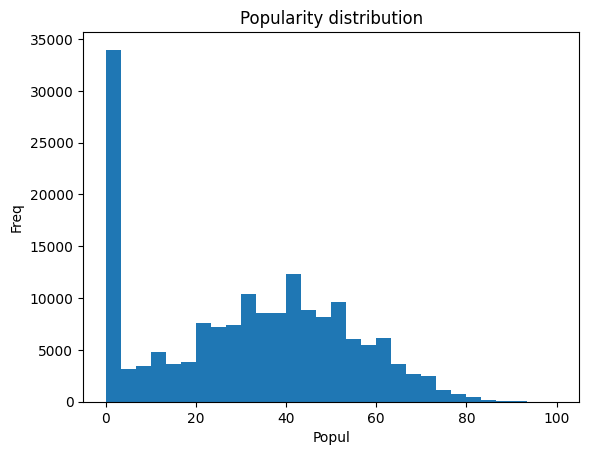

In [17]:
import matplotlib.pyplot as plt
plt.hist(df['popularity'] ,bins= 30)
plt.xlabel('Popul')
plt.ylabel('Freq')
plt.title('Popularity distribution')
plt.show()


In [18]:
df_final = df.drop(columns=['name'])
display(df_final.columns)

Index(['valence', 'year', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'explicit', 'id', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'popularity', 'release_date', 'speechiness',
       'tempo', 'hit'],
      dtype='object')

In [20]:
df_final_data = df.drop(columns= ["id","name","release_date","popularity"])
display(df_final_data.columns)

Index(['valence', 'year', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'speechiness', 'tempo', 'hit'],
      dtype='object')

In [25]:
df_final_data.to_csv('df_final_data.csv', index=False)